# NYC ACS DATA ANALYSIS

I had originally worked on a notebook for 8 hours and all of my commands end up getting erase somehow at the end. Earlier, I had also had issued opening data I had save to my jupyterhub, saying that it couldn't find it. I unfotunatly don't have the time to recreate the notebook to the same degreee. So I'll just be running commands without much explaining and streamlining as much as possible. Originally, I had created maps for each demographic data using natural breaks, quantiles, and natural breaks. Photos of these maps can be found on my group github. I had also conducted histograms for each set of data. All demographic data is not normally distributed, therefore we decided Natural breaks would be best. Therefore, in this notebook I will only be showing natural breaks. 

## Race

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
from shapely import wkt
import plotly.express as px

from numpy import nan

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
race_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ZIP_ACSData/race_acs2019_5yr_B03002_86000US10465.geojson')
race_acs.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,86000US07002,07002,65091.0,50.0,43303.0,1596.0,28856.0,1271.0,6085.0,950.0,...,29.0,7586.0,1200.0,1359.0,502.0,797.0,410.0,562.0,280.0,"MULTIPOLYGON (((-74.14674 40.64947, -74.14503 ..."
1,86000US07008,07008,23589.0,54.0,14200.0,1066.0,6257.0,698.0,2833.0,630.0,...,23.0,1780.0,604.0,490.0,382.0,431.0,362.0,59.0,94.0,"MULTIPOLYGON (((-74.25433 40.58123, -74.25389 ..."
2,86000US07020,07020,12403.0,35.0,10778.0,370.0,5062.0,535.0,560.0,351.0,...,27.0,119.0,102.0,65.0,68.0,14.0,23.0,51.0,64.0,"MULTIPOLYGON (((-73.99451 40.80657, -73.99410 ..."
3,86000US07024,07024,37430.0,50.0,32516.0,538.0,15250.0,675.0,705.0,283.0,...,24.0,739.0,325.0,446.0,250.0,112.0,73.0,334.0,247.0,"MULTIPOLYGON (((-73.99122 40.83604, -73.99105 ..."
4,86000US07036,07036,43845.0,150.0,29960.0,997.0,14591.0,836.0,12480.0,919.0,...,68.0,3247.0,777.0,635.0,281.0,344.0,213.0,291.0,165.0,"MULTIPOLYGON (((-74.25784 40.60216, -74.25769 ..."


In [3]:
race_acs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
race_acs= race_acs.to_crs(epsg=3857)

In [5]:
race_acs.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [6]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

race_acs= race_acs[columns_to_keep]

In [7]:
race_acs.columns = ['GEOID',
 'name',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']
race_acs.head()

,GEOID,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,86000US07002,07002,65091.0,43303.0,28856.0,6085.0,213.0,6351.0,227.0,181.0,1390.0,21788.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23589.0,14200.0,6257.0,2833.0,0.0,4756.0,53.0,134.0,167.0,9389.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12403.0,10778.0,5062.0,560.0,0.0,4718.0,23.0,49.0,366.0,1625.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37430.0,32516.0,15250.0,705.0,68.0,15865.0,11.0,62.0,555.0,4914.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43845.0,29960.0,14591.0,12480.0,92.0,1568.0,0.0,246.0,983.0,13885.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [8]:
race_acs['Percent Non Hispanic'] = race_acs['Non Hispanic']/race_acs['Total_race']*100
race_acs['Percent Hispanic'] = race_acs['Hispanic']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic White'] = race_acs['Non Hispanic White']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Black'] = race_acs['Non Hispanic Black']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic American Indian and Alaska Native'] =race_acs['Non Hispanic American Indian and Alaska Native']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Asian'] = race_acs['Non Hispanic Asian']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] =race_acs['Non Hispanic Native Hawaiian and Other Pacific Islander']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Some other race'] = race_acs['Non Hispanic Some other race']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Two or more races'] = race_acs['Non Hispanic Two or more races']/race_acs['Total_race']*100
race_acs.sample(5)

,GEOID,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
45,86000US10034,10034,42399.0,13060.0,8477.0,2647.0,15.0,1220.0,14.0,111.0,...,"MULTIPOLYGON (((-8231726.690 4990327.608, -823...",30.802613,69.197387,19.993396,6.243072,0.035378,2.877426,0.033020,0.261799,1.358523
156,86000US11217,11217,41813.0,34789.0,21270.0,8038.0,6.0,3498.0,18.0,233.0,...,"MULTIPOLYGON (((-8236576.323 4965651.160, -823...",83.201397,16.798603,50.869347,19.223686,0.014350,8.365819,0.043049,0.557243,4.127903
177,86000US11239,11239,12772.0,10428.0,2593.0,7209.0,66.0,474.0,0.0,0.0,...,"MULTIPOLYGON (((-8223646.676 4962282.640, -822...",81.647354,18.352646,20.302224,56.443783,0.516755,3.711243,0.000000,0.000000,0.673348
121,86000US10550,10550,37429.0,31224.0,2893.0,26671.0,264.0,619.0,0.0,565.0,...,"MULTIPOLYGON (((-8218447.165 4998431.470, -821...",83.421946,16.578054,7.729301,71.257581,0.705335,1.653798,0.000000,1.509525,0.566406
210,86000US11416,11416,26744.0,14694.0,3357.0,1294.0,0.0,8820.0,29.0,356.0,...,"MULTIPOLYGON (((-8222758.346 4965723.824, -822...",54.943165,45.056835,12.552348,4.838468,0.000000,32.979360,0.108436,1.331140,3.133413


Text(0.5, 1.0, 'Percent Non Hispanic Asian')

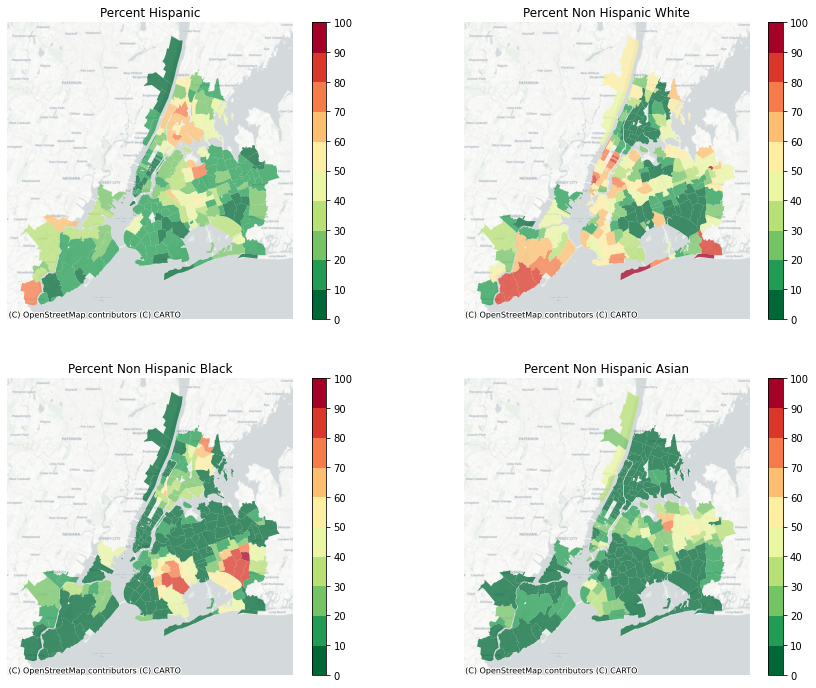

In [9]:

fig, axs = plt.subplots(2, 2, figsize=(15, 12))


race_acs.plot(column='Percent Hispanic', 
            cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},
            ax=axs[0,0], # this assigns the map to the subplot,
          legend=True )

ctx.add_basemap(axs[0,0],source=ctx.providers.CartoDB.Positron)
axs[0,0].axis("off")
axs[0,0].set_title("Percent Hispanic")


race_acs.plot(column='Percent Non Hispanic White', 
              cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},
            ax=axs[0,1], # this assigns the map to the subplot
            legend=True
           )

axs[0,1].axis("off")
axs[0,1].set_title("Percent Non Hispanic White")
ctx.add_basemap(axs[0,1],source=ctx.providers.CartoDB.Positron)

race_acs.plot(column='Percent Non Hispanic Black', 
                cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},
            ax=axs[1,0], # this assigns the map to the subplot
            legend=True
           )
ctx.add_basemap(axs[1,0],source=ctx.providers.CartoDB.Positron)
axs[1,0].axis("off")
axs[1,0].set_title("Percent Non Hispanic Black")

race_acs.plot(column='Percent Non Hispanic Asian', 
             cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},
            ax=axs[1,1], # this assigns the map to the subplot
            legend=True
           )
ctx.add_basemap(axs[1,1],source=ctx.providers.CartoDB.Positron)
axs[1,1].axis("off")
axs[1,1].set_title("Percent Non Hispanic Asian")

## Older Adults (over 65)

In [10]:
age_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ZIP_ACSData/age_acs2019_5yr_B01001_86000US10465.geojson')
age_acs.head()

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry
0,86000US07002,07002,65091.0,50.0,31844.0,722.0,2701.0,425.0,1955.0,309.0,...,189.0,1166.0,223.0,1076.0,201.0,719.0,188.0,792.0,223.0,"MULTIPOLYGON (((-74.14674 40.64947, -74.14503 ..."
1,86000US07008,07008,23589.0,54.0,11308.0,495.0,779.0,356.0,494.0,191.0,...,160.0,266.0,90.0,375.0,178.0,181.0,71.0,395.0,154.0,"MULTIPOLYGON (((-74.25433 40.58123, -74.25389 ..."
2,86000US07020,07020,12403.0,35.0,5978.0,343.0,613.0,193.0,365.0,117.0,...,69.0,148.0,65.0,191.0,111.0,59.0,44.0,258.0,116.0,"MULTIPOLYGON (((-73.99451 40.80657, -73.99410 ..."
3,86000US07024,07024,37430.0,50.0,17882.0,402.0,1021.0,212.0,1003.0,209.0,...,142.0,1389.0,212.0,1107.0,236.0,853.0,204.0,944.0,158.0,"MULTIPOLYGON (((-73.99122 40.83604, -73.99105 ..."
4,86000US07036,07036,43845.0,150.0,20747.0,546.0,1053.0,212.0,1139.0,232.0,...,151.0,781.0,161.0,848.0,186.0,483.0,126.0,443.0,122.0,"MULTIPOLYGON (((-74.25784 40.60216, -74.25769 ..."


In [11]:
age_acs= age_acs.to_crs(epsg=3857)

In [12]:
age_acs.columns.to_list()

['geoid',
 'name',
 'B01001001',
 'B01001001, Error',
 'B01001002',
 'B01001002, Error',
 'B01001003',
 'B01001003, Error',
 'B01001004',
 'B01001004, Error',
 'B01001005',
 'B01001005, Error',
 'B01001006',
 'B01001006, Error',
 'B01001007',
 'B01001007, Error',
 'B01001008',
 'B01001008, Error',
 'B01001009',
 'B01001009, Error',
 'B01001010',
 'B01001010, Error',
 'B01001011',
 'B01001011, Error',
 'B01001012',
 'B01001012, Error',
 'B01001013',
 'B01001013, Error',
 'B01001014',
 'B01001014, Error',
 'B01001015',
 'B01001015, Error',
 'B01001016',
 'B01001016, Error',
 'B01001017',
 'B01001017, Error',
 'B01001018',
 'B01001018, Error',
 'B01001019',
 'B01001019, Error',
 'B01001020',
 'B01001020, Error',
 'B01001021',
 'B01001021, Error',
 'B01001022',
 'B01001022, Error',
 'B01001023',
 'B01001023, Error',
 'B01001024',
 'B01001024, Error',
 'B01001025',
 'B01001025, Error',
 'B01001026',
 'B01001026, Error',
 'B01001027',
 'B01001027, Error',
 'B01001028',
 'B01001028, Error',
 

In [13]:
columns_to_keep_2 = ['geoid',
 'name',
 'B01001001',
 'B01001020',
 'B01001021',
 'B01001022',
 'B01001023',
 'B01001024',
 'B01001025',
 'B01001044',
 'B01001045',
 'B01001046',
 'B01001047',
'B01001048',
'B01001049',
 'geometry']

age_acs= age_acs[columns_to_keep_2]


In [14]:
age_acs.columns = ['GEOID',
 'name',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
  'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'geometry']
age_acs.head()

,GEOID,name,Total_age,Male 65 to 66,Male 67 to 69,Male 70 to 74,Male 75 to 79,Male 80 to 84,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry
0,86000US07002,07002,65091.0,483.0,932.0,941.0,685.0,463.0,359.0,681.0,915.0,1166.0,1076.0,719.0,792.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23589.0,165.0,236.0,187.0,195.0,197.0,100.0,218.0,314.0,266.0,375.0,181.0,395.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12403.0,75.0,130.0,113.0,138.0,86.0,115.0,28.0,124.0,148.0,191.0,59.0,258.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37430.0,446.0,768.0,861.0,737.0,522.0,613.0,447.0,633.0,1389.0,1107.0,853.0,944.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43845.0,389.0,660.0,592.0,460.0,258.0,244.0,508.0,658.0,781.0,848.0,483.0,443.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [15]:
pop_over65 = ['Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
  'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above']

age_acs['Total Over 65']=age_acs[pop_over65].sum(axis=1)
age_acs.head()

,GEOID,name,Total_age,Male 65 to 66,Male 67 to 69,Male 70 to 74,Male 75 to 79,Male 80 to 84,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry,Total Over 65
0,86000US07002,07002,65091.0,483.0,932.0,941.0,685.0,463.0,359.0,681.0,915.0,1166.0,1076.0,719.0,792.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",9212.0
1,86000US07008,07008,23589.0,165.0,236.0,187.0,195.0,197.0,100.0,218.0,314.0,266.0,375.0,181.0,395.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",2829.0
2,86000US07020,07020,12403.0,75.0,130.0,113.0,138.0,86.0,115.0,28.0,124.0,148.0,191.0,59.0,258.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",1465.0
3,86000US07024,07024,37430.0,446.0,768.0,861.0,737.0,522.0,613.0,447.0,633.0,1389.0,1107.0,853.0,944.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",9320.0
4,86000US07036,07036,43845.0,389.0,660.0,592.0,460.0,258.0,244.0,508.0,658.0,781.0,848.0,483.0,443.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",6324.0


In [16]:
age_acs['Percent Over 65'] = age_acs['Total Over 65']/age_acs['Total_age']*100
age_acs.head()

,GEOID,name,Total_age,Male 65 to 66,Male 67 to 69,Male 70 to 74,Male 75 to 79,Male 80 to 84,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry,Total Over 65,Percent Over 65
0,86000US07002,07002,65091.0,483.0,932.0,941.0,685.0,463.0,359.0,681.0,915.0,1166.0,1076.0,719.0,792.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",9212.0,14.152494
1,86000US07008,07008,23589.0,165.0,236.0,187.0,195.0,197.0,100.0,218.0,314.0,266.0,375.0,181.0,395.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",2829.0,11.992878
2,86000US07020,07020,12403.0,75.0,130.0,113.0,138.0,86.0,115.0,28.0,124.0,148.0,191.0,59.0,258.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",1465.0,11.811658
3,86000US07024,07024,37430.0,446.0,768.0,861.0,737.0,522.0,613.0,447.0,633.0,1389.0,1107.0,853.0,944.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",9320.0,24.899813
4,86000US07036,07036,43845.0,389.0,660.0,592.0,460.0,258.0,244.0,508.0,658.0,781.0,848.0,483.0,443.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",6324.0,14.423537


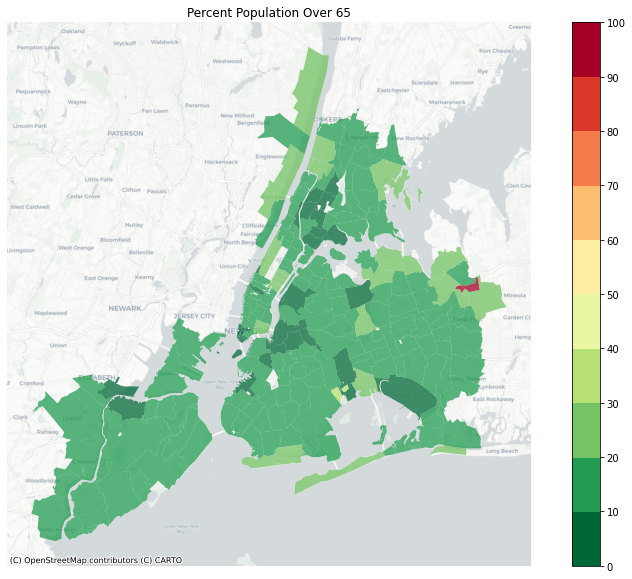

In [17]:
fig, ax=plt.subplots(figsize=(15,10))
age_acs.plot(ax=ax,
               column='Percent Over 65',
                cmap=plt.get_cmap('RdYlGn_r',10),
             legend=True, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},)

ax.set_title("Percent Population Over 65")

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Disability

In [18]:
disability_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ZIP_ACSData/disability_acs2019_5yr_B18101_86000US10465.geojson')
disability_acs.head()

,geoid,name,B18101001,"B18101001, Error",B18101002,"B18101002, Error",B18101003,"B18101003, Error",B18101004,"B18101004, Error",...,"B18101035, Error",B18101036,"B18101036, Error",B18101037,"B18101037, Error",B18101038,"B18101038, Error",B18101039,"B18101039, Error",geometry
0,86000US07002,07002,65035.0,64.0,31803.0,721.0,2701.0,425.0,14.0,25.0,...,149.0,2246.0,279.0,2587.0,340.0,1470.0,291.0,1117.0,236.0,"MULTIPOLYGON (((-74.14674 40.64947, -74.14503 ..."
1,86000US07008,07008,23581.0,57.0,11300.0,496.0,779.0,356.0,0.0,23.0,...,88.0,613.0,172.0,951.0,238.0,446.0,153.0,505.0,202.0,"MULTIPOLYGON (((-74.25433 40.58123, -74.25389 ..."
2,86000US07020,07020,12403.0,35.0,5978.0,343.0,613.0,193.0,0.0,19.0,...,25.0,279.0,89.0,508.0,164.0,264.0,104.0,244.0,125.0,"MULTIPOLYGON (((-73.99451 40.80657, -73.99410 ..."
3,86000US07024,07024,37374.0,66.0,17826.0,406.0,1021.0,212.0,0.0,26.0,...,123.0,2154.0,237.0,2904.0,276.0,1095.0,162.0,1809.0,253.0,"MULTIPOLYGON (((-73.99122 40.83604, -73.99105 ..."
4,86000US07036,07036,43553.0,213.0,20598.0,541.0,1053.0,212.0,23.0,29.0,...,172.0,1295.0,159.0,1680.0,226.0,920.0,183.0,760.0,148.0,"MULTIPOLYGON (((-74.25784 40.60216, -74.25769 ..."


In [19]:
disability_acs= disability_acs.to_crs(epsg=3857)

In [20]:
disability_acs.columns.to_list()

['geoid',
 'name',
 'B18101001',
 'B18101001, Error',
 'B18101002',
 'B18101002, Error',
 'B18101003',
 'B18101003, Error',
 'B18101004',
 'B18101004, Error',
 'B18101005',
 'B18101005, Error',
 'B18101006',
 'B18101006, Error',
 'B18101007',
 'B18101007, Error',
 'B18101008',
 'B18101008, Error',
 'B18101009',
 'B18101009, Error',
 'B18101010',
 'B18101010, Error',
 'B18101011',
 'B18101011, Error',
 'B18101012',
 'B18101012, Error',
 'B18101013',
 'B18101013, Error',
 'B18101014',
 'B18101014, Error',
 'B18101015',
 'B18101015, Error',
 'B18101016',
 'B18101016, Error',
 'B18101017',
 'B18101017, Error',
 'B18101018',
 'B18101018, Error',
 'B18101019',
 'B18101019, Error',
 'B18101020',
 'B18101020, Error',
 'B18101021',
 'B18101021, Error',
 'B18101022',
 'B18101022, Error',
 'B18101023',
 'B18101023, Error',
 'B18101024',
 'B18101024, Error',
 'B18101025',
 'B18101025, Error',
 'B18101026',
 'B18101026, Error',
 'B18101027',
 'B18101027, Error',
 'B18101028',
 'B18101028, Error',
 

In [21]:
columns_to_keep_3 = ['geoid',
 'name',
 'B18101001',
 'B18101004',
 'B18101007',
 'B18101010',
 'B18101013',
 'B18101016',
 'B18101019',
 'B18101023',
 'B18101026',
 'B18101029',
 'B18101032',
'B18101035',
'B18101037',
 'geometry']

disability_acs= disability_acs[columns_to_keep_3]
disability_acs.head()

,geoid,name,B18101001,B18101004,B18101007,B18101010,B18101013,B18101016,B18101019,B18101023,B18101026,B18101029,B18101032,B18101035,B18101037,geometry
0,86000US07002,07002,65035.0,14.0,456.0,377.0,1115.0,513.0,562.0,0.0,217.0,302.0,1379.0,516.0,2587.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23581.0,0.0,232.0,216.0,412.0,163.0,268.0,0.0,0.0,102.0,527.0,185.0,951.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12403.0,0.0,0.0,62.0,156.0,33.0,152.0,0.0,38.0,5.0,50.0,21.0,508.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37374.0,0.0,67.0,76.0,242.0,344.0,763.0,0.0,5.0,114.0,201.0,315.0,2904.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43553.0,23.0,111.0,431.0,965.0,432.0,379.0,0.0,101.0,149.0,1154.0,622.0,1680.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [22]:
disability_acs.columns = ['GEOID',
 'name',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
  'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'geometry']
disability_acs.head()

,GEOID,name,Total_disabilitydata,Male under 5 years,Male 5 to 17,Male 18 to 34,Male 35 to 64,Male 65 to 74,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry
0,86000US07002,07002,65035.0,14.0,456.0,377.0,1115.0,513.0,562.0,0.0,217.0,302.0,1379.0,516.0,2587.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23581.0,0.0,232.0,216.0,412.0,163.0,268.0,0.0,0.0,102.0,527.0,185.0,951.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12403.0,0.0,0.0,62.0,156.0,33.0,152.0,0.0,38.0,5.0,50.0,21.0,508.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37374.0,0.0,67.0,76.0,242.0,344.0,763.0,0.0,5.0,114.0,201.0,315.0,2904.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43553.0,23.0,111.0,431.0,965.0,432.0,379.0,0.0,101.0,149.0,1154.0,622.0,1680.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [23]:
pop_disability = ['Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
  'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above']

disability_acs['Total Population with Disabilities']= disability_acs[pop_disability].sum(axis=1)
disability_acs.head()

,GEOID,name,Total_disabilitydata,Male under 5 years,Male 5 to 17,Male 18 to 34,Male 35 to 64,Male 65 to 74,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry,Total Population with Disabilities
0,86000US07002,07002,65035.0,14.0,456.0,377.0,1115.0,513.0,562.0,0.0,217.0,302.0,1379.0,516.0,2587.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",8038.0
1,86000US07008,07008,23581.0,0.0,232.0,216.0,412.0,163.0,268.0,0.0,0.0,102.0,527.0,185.0,951.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",3056.0
2,86000US07020,07020,12403.0,0.0,0.0,62.0,156.0,33.0,152.0,0.0,38.0,5.0,50.0,21.0,508.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",1025.0
3,86000US07024,07024,37374.0,0.0,67.0,76.0,242.0,344.0,763.0,0.0,5.0,114.0,201.0,315.0,2904.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",5031.0
4,86000US07036,07036,43553.0,23.0,111.0,431.0,965.0,432.0,379.0,0.0,101.0,149.0,1154.0,622.0,1680.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",6047.0


In [24]:
disability_acs['Percent with Disabilities'] = disability_acs['Total Population with Disabilities']/disability_acs['Total_disabilitydata']*100
disability_acs.head()

,GEOID,name,Total_disabilitydata,Male under 5 years,Male 5 to 17,Male 18 to 34,Male 35 to 64,Male 65 to 74,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry,Total Population with Disabilities,Percent with Disabilities
0,86000US07002,07002,65035.0,14.0,456.0,377.0,1115.0,513.0,562.0,0.0,217.0,302.0,1379.0,516.0,2587.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",8038.0,12.359499
1,86000US07008,07008,23581.0,0.0,232.0,216.0,412.0,163.0,268.0,0.0,0.0,102.0,527.0,185.0,951.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",3056.0,12.959586
2,86000US07020,07020,12403.0,0.0,0.0,62.0,156.0,33.0,152.0,0.0,38.0,5.0,50.0,21.0,508.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",1025.0,8.264130
3,86000US07024,07024,37374.0,0.0,67.0,76.0,242.0,344.0,763.0,0.0,5.0,114.0,201.0,315.0,2904.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",5031.0,13.461230
4,86000US07036,07036,43553.0,23.0,111.0,431.0,965.0,432.0,379.0,0.0,101.0,149.0,1154.0,622.0,1680.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",6047.0,13.884233


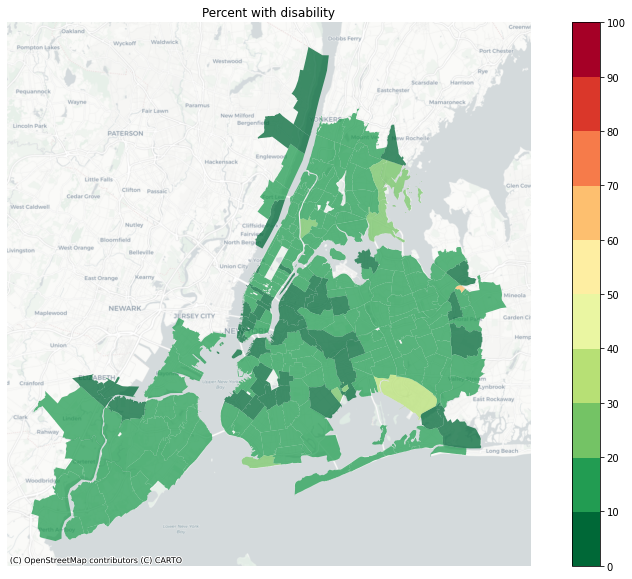

In [25]:
fig, ax=plt.subplots(figsize=(15,10))
disability_acs.plot(ax=ax,
               column='Percent with Disabilities',
               legend=True,
              cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},)

ax.set_title("Percent with disability")

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Poverty

In [26]:
poverty_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ZIP_ACSData/poverty_acs2019_5yr_B17001_86000US10465.geojson')
poverty_acs.head()

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
0,86000US07002,07002,65027.0,64.0,8798.0,1021.0,3854.0,552.0,294.0,153.0,...,396.0,3528.0,324.0,4188.0,392.0,2497.0,287.0,2111.0,313.0,"MULTIPOLYGON (((-74.14674 40.64947, -74.14503 ..."
1,86000US07008,07008,23542.0,86.0,3074.0,921.0,1029.0,371.0,54.0,66.0,...,254.0,1544.0,249.0,1314.0,228.0,721.0,168.0,719.0,201.0,"MULTIPOLYGON (((-74.25433 40.58123, -74.25389 ..."
2,86000US07020,07020,12398.0,35.0,857.0,324.0,277.0,137.0,32.0,56.0,...,207.0,638.0,160.0,812.0,178.0,287.0,90.0,368.0,145.0,"MULTIPOLYGON (((-73.99451 40.80657, -73.99410 ..."
3,86000US07024,07024,37430.0,50.0,3579.0,537.0,1357.0,238.0,60.0,38.0,...,263.0,2446.0,226.0,2413.0,252.0,2115.0,269.0,2465.0,268.0,"MULTIPOLYGON (((-73.99122 40.83604, -73.99105 ..."
4,86000US07036,07036,43550.0,218.0,3577.0,654.0,1460.0,346.0,159.0,99.0,...,264.0,3113.0,299.0,3058.0,297.0,1658.0,187.0,1541.0,228.0,"MULTIPOLYGON (((-74.25784 40.60216, -74.25769 ..."


In [27]:
poverty_acs= poverty_acs.to_crs(epsg=3857)

In [28]:
poverty_acs.columns.to_list()

['geoid',
 'name',
 'B17001001',
 'B17001001, Error',
 'B17001002',
 'B17001002, Error',
 'B17001003',
 'B17001003, Error',
 'B17001004',
 'B17001004, Error',
 'B17001005',
 'B17001005, Error',
 'B17001006',
 'B17001006, Error',
 'B17001007',
 'B17001007, Error',
 'B17001008',
 'B17001008, Error',
 'B17001009',
 'B17001009, Error',
 'B17001010',
 'B17001010, Error',
 'B17001011',
 'B17001011, Error',
 'B17001012',
 'B17001012, Error',
 'B17001013',
 'B17001013, Error',
 'B17001014',
 'B17001014, Error',
 'B17001015',
 'B17001015, Error',
 'B17001016',
 'B17001016, Error',
 'B17001017',
 'B17001017, Error',
 'B17001018',
 'B17001018, Error',
 'B17001019',
 'B17001019, Error',
 'B17001020',
 'B17001020, Error',
 'B17001021',
 'B17001021, Error',
 'B17001022',
 'B17001022, Error',
 'B17001023',
 'B17001023, Error',
 'B17001024',
 'B17001024, Error',
 'B17001025',
 'B17001025, Error',
 'B17001026',
 'B17001026, Error',
 'B17001027',
 'B17001027, Error',
 'B17001028',
 'B17001028, Error',
 

In [29]:
columns_to_keep_4 = ['geoid',
 'name',
 'B17001001',
 'B17001002',
 'geometry']

poverty_acs= poverty_acs[columns_to_keep_4]
poverty_acs.head()

,geoid,name,B17001001,B17001002,geometry
0,86000US07002,07002,65027.0,8798.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23542.0,3074.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12398.0,857.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37430.0,3579.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43550.0,3577.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [30]:
poverty_acs.columns = ['GEOID',
 'name',
 'Total_povertydata',
 'Total living in poverty',
 'geometry']
poverty_acs.head()

,GEOID,name,Total_povertydata,Total living in poverty,geometry
0,86000US07002,07002,65027.0,8798.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23542.0,3074.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12398.0,857.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37430.0,3579.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43550.0,3577.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [31]:
poverty_acs['Percent Living in Poverty'] = poverty_acs['Total living in poverty']/poverty_acs['Total_povertydata']*100
poverty_acs.head()

,GEOID,name,Total_povertydata,Total living in poverty,geometry,Percent Living in Poverty
0,86000US07002,07002,65027.0,8798.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",13.529765
1,86000US07008,07008,23542.0,3074.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",13.057514
2,86000US07020,07020,12398.0,857.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",6.912405
3,86000US07024,07024,37430.0,3579.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",9.561849
4,86000US07036,07036,43550.0,3577.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",8.213548


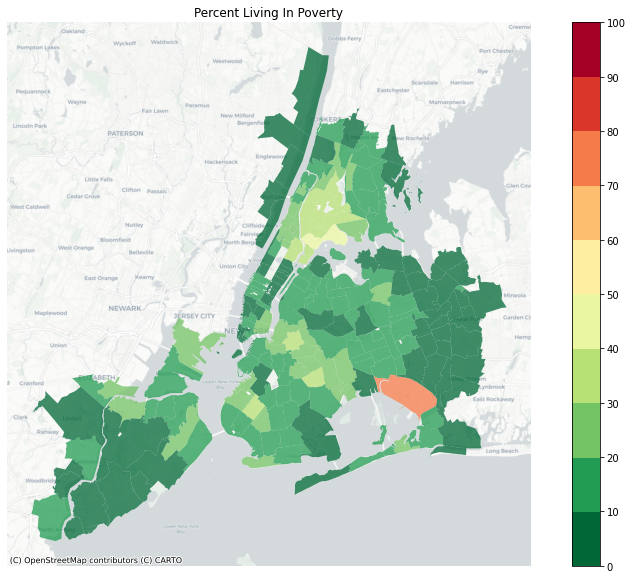

In [32]:
fig, ax=plt.subplots(figsize=(15,10))
poverty_acs.plot(ax=ax,
               column='Percent Living in Poverty',
               legend=True,
                cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},)

ax.set_title("Percent Living In Poverty")

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Nativity 

In [33]:
nativity_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ZIP_ACSData/nativity_acs2019_5yr_B05012_86000US10465.geojson')
nativity_acs.head()

,geoid,name,B05012001,"B05012001, Error",B05012002,"B05012002, Error",B05012003,"B05012003, Error",geometry
0,86000US07002,07002,65091.0,50.0,44993.0,1144.0,20098.0,1140.0,"MULTIPOLYGON (((-74.14674 40.64947, -74.14503 ..."
1,86000US07008,07008,23589.0,54.0,16064.0,853.0,7525.0,854.0,"MULTIPOLYGON (((-74.25433 40.58123, -74.25389 ..."
2,86000US07020,07020,12403.0,35.0,6707.0,537.0,5696.0,531.0,"MULTIPOLYGON (((-73.99451 40.80657, -73.99410 ..."
3,86000US07024,07024,37430.0,50.0,18296.0,653.0,19134.0,652.0,"MULTIPOLYGON (((-73.99122 40.83604, -73.99105 ..."
4,86000US07036,07036,43845.0,150.0,29489.0,881.0,14356.0,869.0,"MULTIPOLYGON (((-74.25784 40.60216, -74.25769 ..."


In [34]:
nativity_acs= nativity_acs.to_crs(epsg=3857)

In [35]:
nativity_acs.columns.to_list()

['geoid',
 'name',
 'B05012001',
 'B05012001, Error',
 'B05012002',
 'B05012002, Error',
 'B05012003',
 'B05012003, Error',
 'geometry']

In [36]:
columns_to_keep_5 = ['geoid',
 'name',
 'B05012001',
 'B05012002',
 'B05012003',
 'geometry']

nativity_acs= nativity_acs[columns_to_keep_5]
nativity_acs.head()

,geoid,name,B05012001,B05012002,B05012003,geometry
0,86000US07002,07002,65091.0,44993.0,20098.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23589.0,16064.0,7525.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12403.0,6707.0,5696.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37430.0,18296.0,19134.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43845.0,29489.0,14356.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [37]:
nativity_acs.columns = ['GEOID',
 'name',
 'Total_nativitydata',
 'Total_nativeborn',
  'Total_foreignborn',
 'geometry']
nativity_acs.head()

,GEOID,name,Total_nativitydata,Total_nativeborn,Total_foreignborn,geometry
0,86000US07002,07002,65091.0,44993.0,20098.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,23589.0,16064.0,7525.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,12403.0,6707.0,5696.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,37430.0,18296.0,19134.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,43845.0,29489.0,14356.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [38]:
nativity_acs['Percent_ForeignBorn'] = nativity_acs['Total_foreignborn']/nativity_acs['Total_nativitydata']*100
nativity_acs.head()

,GEOID,name,Total_nativitydata,Total_nativeborn,Total_foreignborn,geometry,Percent_ForeignBorn
0,86000US07002,07002,65091.0,44993.0,20098.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",30.876773
1,86000US07008,07008,23589.0,16064.0,7525.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",31.900462
2,86000US07020,07020,12403.0,6707.0,5696.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",45.924373
3,86000US07024,07024,37430.0,18296.0,19134.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",51.119423
4,86000US07036,07036,43845.0,29489.0,14356.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",32.742616


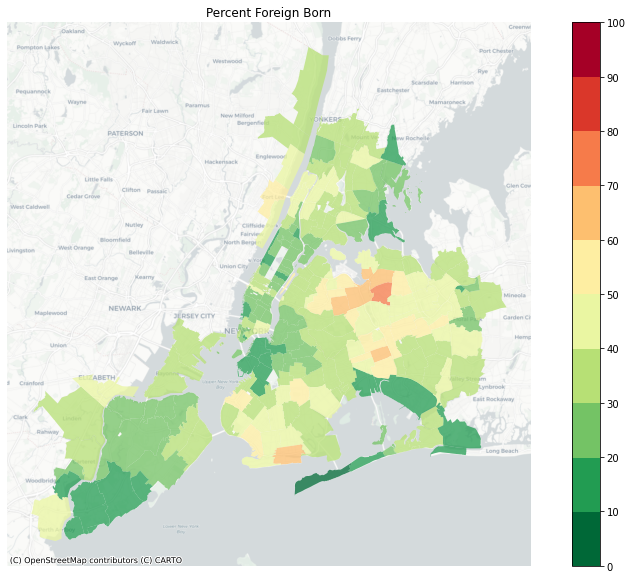

In [39]:
fig, ax=plt.subplots(figsize=(15,10))
nativity_acs.plot(ax=ax,
               column='Percent_ForeignBorn',
               legend=True,
                cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},)

ax.set_title("Percent Foreign Born")

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Educational Attainment

In [40]:
education_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ZIP_ACSData/education_acs2019_5yr_B15003_86000US10465.geojson')
education_acs.head()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
0,86000US07002,07002,45531.0,800.0,824.0,217.0,0.0,29.0,0.0,29.0,...,400.0,11663.0,844.0,3912.0,435.0,856.0,201.0,524.0,202.0,"MULTIPOLYGON (((-74.14674 40.64947, -74.14503 ..."
1,86000US07008,07008,16175.0,521.0,556.0,249.0,12.0,18.0,0.0,23.0,...,248.0,2958.0,406.0,825.0,241.0,77.0,65.0,66.0,64.0,"MULTIPOLYGON (((-74.25433 40.58123, -74.25389 ..."
2,86000US07020,07020,9474.0,304.0,60.0,44.0,0.0,19.0,0.0,19.0,...,146.0,4131.0,400.0,2071.0,268.0,560.0,208.0,201.0,86.0,"MULTIPOLYGON (((-73.99451 40.80657, -73.99410 ..."
3,86000US07024,07024,29463.0,445.0,370.0,123.0,22.0,23.0,16.0,26.0,...,345.0,10513.0,525.0,4722.0,422.0,1377.0,211.0,945.0,156.0,"MULTIPOLYGON (((-73.99122 40.83604, -73.99105 ..."
4,86000US07036,07036,30728.0,617.0,723.0,193.0,0.0,26.0,20.0,31.0,...,405.0,4732.0,478.0,1882.0,296.0,235.0,92.0,139.0,68.0,"MULTIPOLYGON (((-74.25784 40.60216, -74.25769 ..."


In [41]:
education_acs= education_acs.to_crs(epsg=3857)
education_acs.columns.to_list()

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

In [42]:
pop_nohsdiploma = ['B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
  'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016']

education_acs['Less_ThanHSDiploma']= education_acs[pop_nohsdiploma].sum(axis=1)
education_acs.head()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry,Less_ThanHSDiploma
0,86000US07002,07002,45531.0,800.0,824.0,217.0,0.0,29.0,0.0,29.0,...,11663.0,844.0,3912.0,435.0,856.0,201.0,524.0,202.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",5192.0
1,86000US07008,07008,16175.0,521.0,556.0,249.0,12.0,18.0,0.0,23.0,...,2958.0,406.0,825.0,241.0,77.0,65.0,66.0,64.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",2333.0
2,86000US07020,07020,9474.0,304.0,60.0,44.0,0.0,19.0,0.0,19.0,...,4131.0,400.0,2071.0,268.0,560.0,208.0,201.0,86.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",251.0
3,86000US07024,07024,29463.0,445.0,370.0,123.0,22.0,23.0,16.0,26.0,...,10513.0,525.0,4722.0,422.0,1377.0,211.0,945.0,156.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",1610.0
4,86000US07036,07036,30728.0,617.0,723.0,193.0,0.0,26.0,20.0,31.0,...,4732.0,478.0,1882.0,296.0,235.0,92.0,139.0,68.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",4476.0


In [43]:
pop_hsgrad = ['B15003017',
 'B15003018',
 ]

education_acs['HSGrad']= education_acs[pop_hsgrad ].sum(axis=1)
education_acs.head()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry,Less_ThanHSDiploma,HSGrad
0,86000US07002,07002,45531.0,800.0,824.0,217.0,0.0,29.0,0.0,29.0,...,844.0,3912.0,435.0,856.0,201.0,524.0,202.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",5192.0,14149.0
1,86000US07008,07008,16175.0,521.0,556.0,249.0,12.0,18.0,0.0,23.0,...,406.0,825.0,241.0,77.0,65.0,66.0,64.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",2333.0,5640.0
2,86000US07020,07020,9474.0,304.0,60.0,44.0,0.0,19.0,0.0,19.0,...,400.0,2071.0,268.0,560.0,208.0,201.0,86.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",251.0,1277.0
3,86000US07024,07024,29463.0,445.0,370.0,123.0,22.0,23.0,16.0,26.0,...,525.0,4722.0,422.0,1377.0,211.0,945.0,156.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",1610.0,5157.0
4,86000US07036,07036,30728.0,617.0,723.0,193.0,0.0,26.0,20.0,31.0,...,478.0,1882.0,296.0,235.0,92.0,139.0,68.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",4476.0,10127.0


In [45]:
pop_somecollege_associates = ['B15003019',
 'B15003020',
  'B15003021',
 ]

education_acs['somecollege_associates']= education_acs[pop_somecollege_associates ].sum(axis=1)
education_acs.head()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry,Less_ThanHSDiploma,HSGrad,somecollege_associates
0,86000US07002,07002,45531.0,800.0,824.0,217.0,0.0,29.0,0.0,29.0,...,3912.0,435.0,856.0,201.0,524.0,202.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",5192.0,14149.0,9235.0
1,86000US07008,07008,16175.0,521.0,556.0,249.0,12.0,18.0,0.0,23.0,...,825.0,241.0,77.0,65.0,66.0,64.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",2333.0,5640.0,4276.0
2,86000US07020,07020,9474.0,304.0,60.0,44.0,0.0,19.0,0.0,19.0,...,2071.0,268.0,560.0,208.0,201.0,86.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",251.0,1277.0,983.0
3,86000US07024,07024,29463.0,445.0,370.0,123.0,22.0,23.0,16.0,26.0,...,4722.0,422.0,1377.0,211.0,945.0,156.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",1610.0,5157.0,5139.0
4,86000US07036,07036,30728.0,617.0,723.0,193.0,0.0,26.0,20.0,31.0,...,1882.0,296.0,235.0,92.0,139.0,68.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",4476.0,10127.0,9137.0


In [46]:
pop_bachelors_beyond = ['B15003022',
 'B15003023',
 'B15003024',
 'B15003025',]

education_acs['bachelors_beyond']= education_acs[pop_bachelors_beyond].sum(axis=1)
education_acs.head()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry,Less_ThanHSDiploma,HSGrad,somecollege_associates,bachelors_beyond
0,86000US07002,07002,45531.0,800.0,824.0,217.0,0.0,29.0,0.0,29.0,...,435.0,856.0,201.0,524.0,202.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",5192.0,14149.0,9235.0,16955.0
1,86000US07008,07008,16175.0,521.0,556.0,249.0,12.0,18.0,0.0,23.0,...,241.0,77.0,65.0,66.0,64.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",2333.0,5640.0,4276.0,3926.0
2,86000US07020,07020,9474.0,304.0,60.0,44.0,0.0,19.0,0.0,19.0,...,268.0,560.0,208.0,201.0,86.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",251.0,1277.0,983.0,6963.0
3,86000US07024,07024,29463.0,445.0,370.0,123.0,22.0,23.0,16.0,26.0,...,422.0,1377.0,211.0,945.0,156.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",1610.0,5157.0,5139.0,17557.0
4,86000US07036,07036,30728.0,617.0,723.0,193.0,0.0,26.0,20.0,31.0,...,296.0,235.0,92.0,139.0,68.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",4476.0,10127.0,9137.0,6988.0


In [47]:
columns_to_keep_5 = ['geoid',
 'name',
 'B15003001',
 'Less_ThanHSDiploma',
 'HSGrad',
 'somecollege_associates',
 'bachelors_beyond',
 'geometry']

education_acs= education_acs[columns_to_keep_5]

education_acs.columns = ['geoid',
 'name',
 'Total_educationdata',
 'Less_ThanHSDiploma',
 'HSGrad',
 'somecollege_associates',
 'bachelors_beyond',
 'geometry']

education_acs.head()

,geoid,name,Total_educationdata,Less_ThanHSDiploma,HSGrad,somecollege_associates,bachelors_beyond,geometry
0,86000US07002,07002,45531.0,5192.0,14149.0,9235.0,16955.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825..."
1,86000US07008,07008,16175.0,2333.0,5640.0,4276.0,3926.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826..."
2,86000US07020,07020,9474.0,251.0,1277.0,983.0,6963.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823..."
3,86000US07024,07024,29463.0,1610.0,5157.0,5139.0,17557.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823..."
4,86000US07036,07036,30728.0,4476.0,10127.0,9137.0,6988.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826..."


In [48]:
education_acs['Percent_LessHSDiploma'] = education_acs['Less_ThanHSDiploma']/education_acs['Total_educationdata']*100
education_acs['Percent_bachelorsbeyond'] = education_acs['bachelors_beyond']/education_acs['Total_educationdata']*100
education_acs.head()

,geoid,name,Total_educationdata,Less_ThanHSDiploma,HSGrad,somecollege_associates,bachelors_beyond,geometry,Percent_LessHSDiploma,Percent_bachelorsbeyond
0,86000US07002,07002,45531.0,5192.0,14149.0,9235.0,16955.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",11.403220,37.238365
1,86000US07008,07008,16175.0,2333.0,5640.0,4276.0,3926.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",14.423493,24.272025
2,86000US07020,07020,9474.0,251.0,1277.0,983.0,6963.0,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",2.649356,73.495883
3,86000US07024,07024,29463.0,1610.0,5157.0,5139.0,17557.0,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",5.464481,59.589994
4,86000US07036,07036,30728.0,4476.0,10127.0,9137.0,6988.0,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",14.566519,22.741474


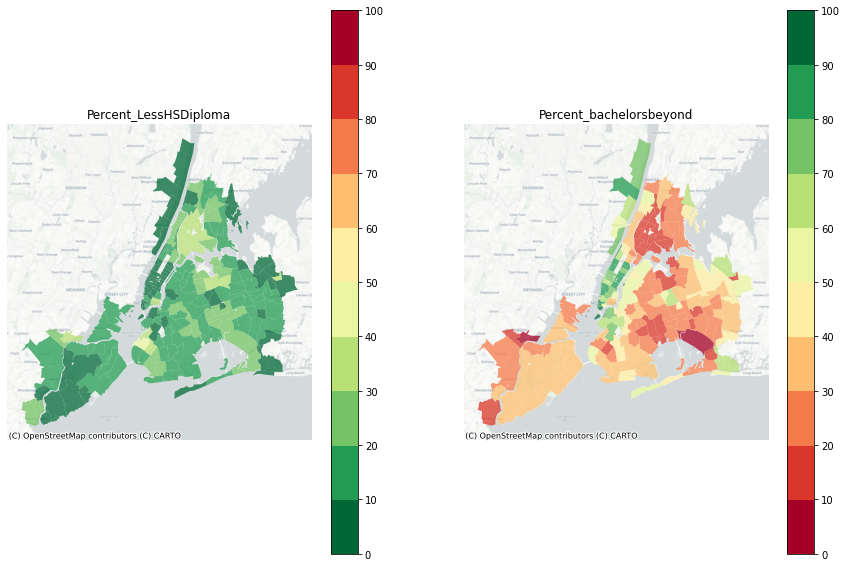

In [49]:
fig, axs=plt.subplots(1,2, figsize=(15,10))
ax1, ax2= axs

education_acs.plot(ax=ax1,
               column='Percent_LessHSDiploma',
               legend=True,
                cmap=plt.get_cmap('RdYlGn_r',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},)

ax1.set_title("Percent_LessHSDiploma")

ax1.axis('off')

ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron)

education_acs.plot(ax=ax2,
               column='Percent_bachelorsbeyond',
               legend=True,
                cmap=plt.get_cmap('RdYlGn',10),
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            vmin=0, vmax=100,
             legend_kwds={'ticks': np.arange(0,101, 10)},)

ax2.set_title("Percent_bachelorsbeyond")

ax2.axis('off')

ctx.add_basemap(ax2,source=ctx.providers.CartoDB.Positron)

# Mergin Data

In [50]:
race_age= race_acs.merge(age_acs, on='name')
race_age.head(2)

,GEOID_x,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry_y,Total Over 65,Percent Over 65
0,86000US07002,07002,65091.0,43303.0,28856.0,6085.0,213.0,6351.0,227.0,181.0,...,359.0,681.0,915.0,1166.0,1076.0,719.0,792.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",9212.0,14.152494
1,86000US07008,07008,23589.0,14200.0,6257.0,2833.0,0.0,4756.0,53.0,134.0,...,100.0,218.0,314.0,266.0,375.0,181.0,395.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",2829.0,11.992878


In [51]:
race_age_disability= race_age.merge(disability_acs, on='name')
race_age_disability.head(2)

,GEOID_x,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry,Total Population with Disabilities,Percent with Disabilities
0,86000US07002,07002,65091.0,43303.0,28856.0,6085.0,213.0,6351.0,227.0,181.0,...,562.0,0.0,217.0,302.0,1379.0,516.0,2587.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",8038.0,12.359499
1,86000US07008,07008,23589.0,14200.0,6257.0,2833.0,0.0,4756.0,53.0,134.0,...,268.0,0.0,0.0,102.0,527.0,185.0,951.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",3056.0,12.959586


In [52]:
race_age_disability_poverty= race_age_disability.merge(poverty_acs, on='name')
race_age_disability_poverty.head(2)

,GEOID_x,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Female 65 to 74,Female 75 and above,geometry_x,Total Population with Disabilities,Percent with Disabilities,GEOID_y,Total_povertydata,Total living in poverty,geometry_y,Percent Living in Poverty
0,86000US07002,07002,65091.0,43303.0,28856.0,6085.0,213.0,6351.0,227.0,181.0,...,516.0,2587.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",8038.0,12.359499,86000US07002,65027.0,8798.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",13.529765
1,86000US07008,07008,23589.0,14200.0,6257.0,2833.0,0.0,4756.0,53.0,134.0,...,185.0,951.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",3056.0,12.959586,86000US07008,23542.0,3074.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",13.057514


In [53]:
race_age_disability_poverty_nativity= race_age_disability_poverty.merge(nativity_acs, on='name')
race_age_disability_poverty_nativity.head(2)

,GEOID_x,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Total_povertydata,Total living in poverty,geometry_y,Percent Living in Poverty,GEOID,Total_nativitydata,Total_nativeborn,Total_foreignborn,geometry,Percent_ForeignBorn
0,86000US07002,07002,65091.0,43303.0,28856.0,6085.0,213.0,6351.0,227.0,181.0,...,65027.0,8798.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",13.529765,86000US07002,65091.0,44993.0,20098.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",30.876773
1,86000US07008,07008,23589.0,14200.0,6257.0,2833.0,0.0,4756.0,53.0,134.0,...,23542.0,3074.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",13.057514,86000US07008,23589.0,16064.0,7525.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",31.900462


In [54]:
nyc_ztca_dem= race_age_disability_poverty_nativity.merge(education_acs, on='name')
nyc_ztca_dem.head(2)

,GEOID_x,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Percent_ForeignBorn,geoid,Total_educationdata,Less_ThanHSDiploma,HSGrad,somecollege_associates,bachelors_beyond,geometry_y,Percent_LessHSDiploma,Percent_bachelorsbeyond
0,86000US07002,07002,65091.0,43303.0,28856.0,6085.0,213.0,6351.0,227.0,181.0,...,30.876773,86000US07002,45531.0,5192.0,14149.0,9235.0,16955.0,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",11.403220,37.238365
1,86000US07008,07008,23589.0,14200.0,6257.0,2833.0,0.0,4756.0,53.0,134.0,...,31.900462,86000US07008,16175.0,2333.0,5640.0,4276.0,3926.0,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",14.423493,24.272025


In [55]:
nyc_ztca_dem.columns.to_list()

['GEOID_x',
 'name',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry_x',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'GEOID_y',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'geometry_y',
 'Total Over 65',
 'Percent Over 65',
 'GEOID

In [56]:
to_keep= [
 'name',
 'geometry_x',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
 'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'Total Population with Disabilities',
 'Percent with Disabilities',
 'GEOID_y',
 'Total_povertydata',
 'Total living in poverty',
 'Percent Living in Poverty',
 'GEOID',
 'Total_nativitydata',
 'Total_nativeborn',
 'Total_foreignborn',
 'Percent_ForeignBorn',
 'geoid',
 'Total_educationdata',
 'Less_ThanHSDiploma',
 'HSGrad',
 'somecollege_associates',
 'bachelors_beyond',
 'Percent_LessHSDiploma',
 'Percent_bachelorsbeyond']

nyc_ztca_dem= nyc_ztca_dem[to_keep]
nyc_ztca_dem.head()

,name,geometry_x,geometry_x,geometry_x,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,...,Total_foreignborn,Percent_ForeignBorn,geoid,Total_educationdata,Less_ThanHSDiploma,HSGrad,somecollege_associates,bachelors_beyond,Percent_LessHSDiploma,Percent_bachelorsbeyond
0,07002,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...","MULTIPOLYGON (((-8253976.784 4960774.660, -825...","MULTIPOLYGON (((-8253976.784 4960774.660, -825...",65091.0,43303.0,28856.0,6085.0,213.0,6351.0,...,20098.0,30.876773,86000US07002,45531.0,5192.0,14149.0,9235.0,16955.0,11.403220,37.238365
1,07008,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...","MULTIPOLYGON (((-8265954.761 4950768.769, -826...","MULTIPOLYGON (((-8265954.761 4950768.769, -826...",23589.0,14200.0,6257.0,2833.0,0.0,4756.0,...,7525.0,31.900462,86000US07008,16175.0,2333.0,5640.0,4276.0,3926.0,14.423493,24.272025
2,07020,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...","MULTIPOLYGON (((-8237030.618 4983852.953, -823...","MULTIPOLYGON (((-8237030.618 4983852.953, -823...",12403.0,10778.0,5062.0,560.0,0.0,4718.0,...,5696.0,45.924373,86000US07020,9474.0,251.0,1277.0,983.0,6963.0,2.649356,73.495883
3,07024,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...","MULTIPOLYGON (((-8236665.045 4988187.157, -823...","MULTIPOLYGON (((-8236665.045 4988187.157, -823...",37430.0,32516.0,15250.0,705.0,68.0,15865.0,...,19134.0,51.119423,86000US07024,29463.0,1610.0,5157.0,5139.0,17557.0,5.464481,59.589994
4,07036,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...","MULTIPOLYGON (((-8266344.380 4953836.717, -826...","MULTIPOLYGON (((-8266344.380 4953836.717, -826...",43845.0,29960.0,14591.0,12480.0,92.0,1568.0,...,14356.0,32.742616,86000US07036,30728.0,4476.0,10127.0,9137.0,6988.0,14.566519,22.741474


In [57]:
nyc_ztca_dem.columns.to_list()

['name',
 'geometry_x',
 'geometry_x',
 'geometry_x',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_disabili

In [58]:
nyc_ztca_dem.columns =['ZCTA',
 'geometry',
 'geometry_x',
 'geometry_x',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
 'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'Total Population with Disabilities',
 'Percent with Disabilities',
 'GEOID_y',
 'GEOID_y',
 'Total_povertydata',
 'Total living in poverty',
 'Percent Living in Poverty',
 'GEOID',
 'Total_nativitydata',
 'Total_nativeborn',
 'Total_foreignborn',
 'Percent_ForeignBorn',
 'geoid',
 'Total_educationdata',
 'Less_ThanHSDiploma',
 'HSGrad',
 'somecollege_associates',
 'bachelors_beyond',
 'Percent_LessHSDiploma',
 'Percent_bachelorsbeyond']


In [59]:
to_keep2= ['ZCTA',
 'geometry',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
 'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'Total Population with Disabilities',
 'Percent with Disabilities',
 'GEOID_y',
 'GEOID_y',
 'Total_povertydata',
 'Total living in poverty',
 'Percent Living in Poverty',
 'GEOID',
 'Total_nativitydata',
 'Total_nativeborn',
 'Total_foreignborn',
 'Percent_ForeignBorn',
 'geoid',
 'Total_educationdata',
 'Less_ThanHSDiploma',
 'HSGrad',
 'somecollege_associates',
 'bachelors_beyond',
 'Percent_LessHSDiploma',
 'Percent_bachelorsbeyond']

nyc_ztca_dem =nyc_ztca_dem[to_keep2].copy()

nyc_ztca_dem.head()

,ZCTA,geometry,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Total_foreignborn,Percent_ForeignBorn,geoid,Total_educationdata,Less_ThanHSDiploma,HSGrad,somecollege_associates,bachelors_beyond,Percent_LessHSDiploma,Percent_bachelorsbeyond
0,07002,"MULTIPOLYGON (((-8253976.784 4960774.660, -825...",65091.0,43303.0,28856.0,6085.0,213.0,6351.0,227.0,181.0,...,20098.0,30.876773,86000US07002,45531.0,5192.0,14149.0,9235.0,16955.0,11.403220,37.238365
1,07008,"MULTIPOLYGON (((-8265954.761 4950768.769, -826...",23589.0,14200.0,6257.0,2833.0,0.0,4756.0,53.0,134.0,...,7525.0,31.900462,86000US07008,16175.0,2333.0,5640.0,4276.0,3926.0,14.423493,24.272025
2,07020,"MULTIPOLYGON (((-8237030.618 4983852.953, -823...",12403.0,10778.0,5062.0,560.0,0.0,4718.0,23.0,49.0,...,5696.0,45.924373,86000US07020,9474.0,251.0,1277.0,983.0,6963.0,2.649356,73.495883
3,07024,"MULTIPOLYGON (((-8236665.045 4988187.157, -823...",37430.0,32516.0,15250.0,705.0,68.0,15865.0,11.0,62.0,...,19134.0,51.119423,86000US07024,29463.0,1610.0,5157.0,5139.0,17557.0,5.464481,59.589994
4,07036,"MULTIPOLYGON (((-8266344.380 4953836.717, -826...",43845.0,29960.0,14591.0,12480.0,92.0,1568.0,0.0,246.0,...,14356.0,32.742616,86000US07036,30728.0,4476.0,10127.0,9137.0,6988.0,14.566519,22.741474


In [60]:
nyc_ztca_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 71 columns):
 #   Column                                                           Non-Null Count  Dtype   
---  ------                                                           --------------  -----   
 0   ZCTA                                                             240 non-null    object  
 1   geometry                                                         240 non-null    geometry
 2   Total_race                                                       240 non-null    float64 
 3   Non Hispanic                                                     240 non-null    float64 
 4   Non Hispanic White                                               240 non-null    float64 
 5   Non Hispanic Black                                               240 non-null    float64 
 6   Non Hispanic American Indian and Alaska Native                   240 non-null    float64 
 7   Non Hispanic Asian                 

In [61]:
nyc_ztca_dem= gpd.GeoDataFrame(nyc_ztca_dem, geometry='geometry').copy()
nyc_ztca_dem.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

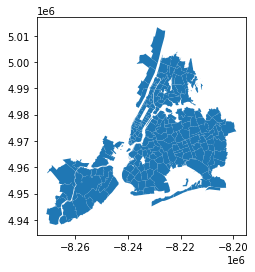

In [62]:
nyc_ztca_dem.plot()

In [66]:
nyc_ztca_dem.to_file('nyc_ztca_demdata.geojson', driver='GeoJSON')